In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statistics
from scipy.special import factorial
from scipy.stats import norm, poisson

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/devanaazzahra/MTDFS/main/data.csv");

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [81]:
def rata(data):
  return sum(data) / len(data)

print("Nilai mean dari radius mean = ", rata(list(dataset['radius_mean'])))
print("Nilai mean dari texture mean = ", rata(list(dataset['texture_mean'])))
print("Nilai mean dari perimeter mean = ", rata(list(dataset['perimeter_mean'])))
print("Nilai mean dari area mean = ", rata(list(dataset['area_mean'])))
print("Nilai mean dari smoothness mean = ", rata(list(dataset['smoothness_mean'])))

Nilai mean dari radius mean =  14.127291739894563
Nilai mean dari texture mean =  19.28964850615117
Nilai mean dari perimeter mean =  91.96903339191566
Nilai mean dari area mean =  654.8891036906857
Nilai mean dari smoothness mean =  0.096360281195079


In [47]:
def variance(data):
  n = len
  mean = rata(data)
  if mean!=0:
    return sum((x - mean) ** 2 for x in data) / n(data)
  else:
    return 0

In [82]:
print("Nilai varian dari radius mean", variance(list(dataset['radius_mean'])))
print("Nilai varian dari texture mean", variance(list(dataset['texture_mean'])))
print("Nilai varian dari perimeter mean", variance(list(dataset['perimeter_mean'])))
print("Nilai varian dari area mean", variance(list(dataset['area_mean'])))
print("Nilai varian dari smoothness mean", variance(list(dataset['smoothness_mean'])))

Nilai varian dari radius mean 12.39709425935181
Nilai varian dari texture mean 18.46639741599513
Nilai varian dari perimeter mean 589.4027985384278
Nilai varian dari area mean 123625.90307986429
Nilai varian dari smoothness mean 0.0001974520733831437


In [49]:
def deviasi(data):
  return variance(data)**(1/2)

In [83]:
print("Nilai standar deviasi dari radius mean = ", deviasi(list(dataset['radius_mean'])))
print("Nilai standar deviasi dari texture mean = ", deviasi(list(dataset['texture_mean'])))
print("Nilai standar deviasi dari perimeter mean = ", deviasi(list(dataset['perimeter_mean'])))
print("Nilai standar deviasi dari area mean = ", deviasi(list(dataset['area_mean'])))
print("Nilai standar deviasi dari smoothness mean = ", deviasi(list(dataset['smoothness_mean'])))

Nilai standar deviasi dari radius mean =  3.5209507607110626
Nilai standar deviasi dari texture mean =  4.297254637090421
Nilai standar deviasi dari perimeter mean =  24.277619293053174
Nilai standar deviasi dari area mean =  351.6047540632298
Nilai standar deviasi dari smoothness mean =  0.014051764066591201


In [15]:
x = np.std(dataset)
print (x)

id                         1.249107e+08
radius_mean                3.520951e+00
texture_mean               4.297255e+00
perimeter_mean             2.427762e+01
area_mean                  3.516048e+02
smoothness_mean            1.405176e-02
compactness_mean           5.276633e-02
concavity_mean             7.964973e-02
concave points_mean        3.876873e-02
symmetry_mean              2.739018e-02
fractal_dimension_mean     7.054156e-03
radius_se                  2.770689e-01
texture_se                 5.511634e-01
perimeter_se               2.020077e+00
area_se                    4.545101e+01
smoothness_se              2.999878e-03
compactness_se             1.789244e-02
concavity_se               3.015952e-02
concave points_se          6.164861e-03
symmetry_se                8.259104e-03
fractal_dimension_se       2.643745e-03
radius_worst               4.828993e+00
texture_worst              6.140854e+00
perimeter_worst            3.357300e+01
area_worst                 5.688565e+02


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


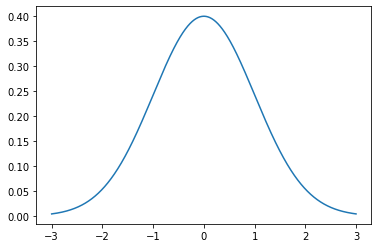

In [5]:
x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x))

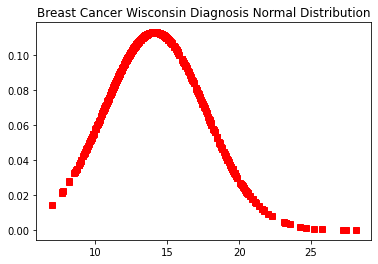

In [80]:
rata_radius = statistics.mean(dataset['radius_mean'])
deviasi_radius = statistics.stdev(dataset['radius_mean'])
normal_dataset = norm.pdf(dataset['radius_mean'],loc=rata_radius,scale=deviasi_radius)
plt.plot(dataset['radius_mean'],normal_dataset, 'bs', color='red')
plt.title("Breast Cancer Wisconsin Diagnosis Normal Distribution")
plt.show()

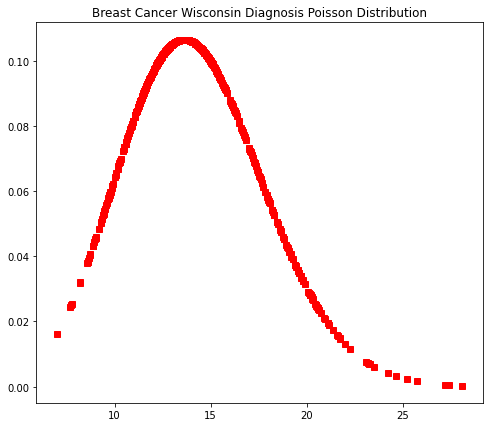

In [77]:
x = pd.Series(dataset['radius_mean']).to_numpy()
y = np.exp(-rata_radius)*np.power(rata_radius, x)/factorial(x)

plt.figure(figsize=(8,7))
plt.title("Breast Cancer Wisconsin Diagnosis Poisson Distribution")
plt.plot(x, y, 'bs', color='red')
plt.show()